In [3]:
import pandas as pd
from webbrowser import get
from env import host, user, password
import matplotlib.pyplot as plt 
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import explore
from copy import deepcopy
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
def get_telco_data():
    filename = 'telco_data.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    database = 'telco_churn'
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

    query = '''
    SELECT monthly_charges, total_charges, tenure
    FROM customers


    '''
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, url)
    print('Saving to csv...')
    df.to_csv(filename, index=False)
    return df

In [5]:
df = get_telco_data()

Reading from csv file...


In [6]:
df.head()

,monthly_charges,total_charges,tenure
0,65.6,593.3,9
1,59.9,542.4,9
2,73.9,280.85,4
3,98.0,1237.85,13
4,83.9,267.4,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   total_charges    7043 non-null   object 
 2   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [8]:
pdf = df.copy(deep=True)

In [9]:
pdf.head()

,monthly_charges,total_charges,tenure
0,65.6,593.3,9
1,59.9,542.4,9
2,73.9,280.85,4
3,98.0,1237.85,13
4,83.9,267.4,3


In [10]:
# convert total_charges to float64 error will be NaN
pdf['total_charges'] = pd.to_numeric(pdf['total_charges'], errors='coerce')
    
# Drop NaN rows since they are 0 in total_charges and reset_index to 0 
pdf = pdf.dropna(axis=0)
pdf.reset_index(drop=True)

# Split data into train, validate, test 
train_validate, test = train_test_split(pdf, test_size=0.2, random_state=42)
train, validate = train_test_split(train_validate, test_size=0.3, random_state=42)

In [11]:
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.X_y(train, validate, test)

In [12]:
train.head()

,monthly_charges,total_charges,tenure
6786,50.40,137.25,3
206,45.35,89.50,2
4582,25.25,186.30,8
4553,83.25,4089.45,51
4091,100.65,7334.05,72


In [11]:
# Create the correlation matrix for all exams.

corr = train.drop(columns=['total_charges']).corr()
corr



,monthly_charges,tenure
monthly_charges,1.000000,0.250423
tenure,0.250423,1.000000


In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(train, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(corr))
plt.ylim(0, 4)

plt.show()


NameError: name 'corr' is not defined

<Figure size 576x432 with 0 Axes>

In [15]:
def corrstatsgraphs(df):
    """
    Description
    ----
    Outputs the general statistical description of the dataframe,
    outputs the correlation heatmap with target label, and outputs a distribution plot.
    
    Parameters
    ----
    df(DataFrame):
        The dataframe for which information will be displayed.
        
    Returns
    ----
    useful stats, correlation, and subplots
    
    """
       
    # Heatmap with min -1 to max 1 to all variables
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    corr = df.corr()
    plt.subplots(figsize=(22, 17))
    plt.title("Heatmap", fontsize = 'x-large')
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 21, as_cmap=True)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, vmin=-1, vmax=1
    )
    # Correlation Heatmap with min -1 to max 1 in conjuction with pd.corr 
    plt.figure(figsize=(10, 8)) 
    plt.title("Heatmap", fontsize = 'x-large')
    sns.heatmap(df.corr()[['total_charges']].sort_values(by='total_charges', 
    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG'
    )
    sns.pairplot(train[['monthly_charges', 'total_charges', 'tenure']], corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}}
    )
    # Correlation Heatmap with min -1 to max 1 in conjuction with pd.corr
    plt.figure(figsize=(16,10))
    df.corr()['total_charges'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5), cmap='BrBG'
    )
    sns.jointplot(x="tenure", y="total_charges", data=train,  kind='reg', height=5, line_kws={'color': 'red'}
    )
    sns.jointplot(x="tenure", y="total_charges", data=train,  kind='kde', height=5, line_kws={'color': 'red'}
    )
      
    sns.jointplot(x="tenure", y="monthly_charges", data=train, ratio=5, kind='reg', height=5, line_kws={'color': 'red'}
    )
    sns.jointplot(x="tenure", y="monthly_charges", data=train,  kind='kde', height=5, line_kws={'color': 'red'}
    )

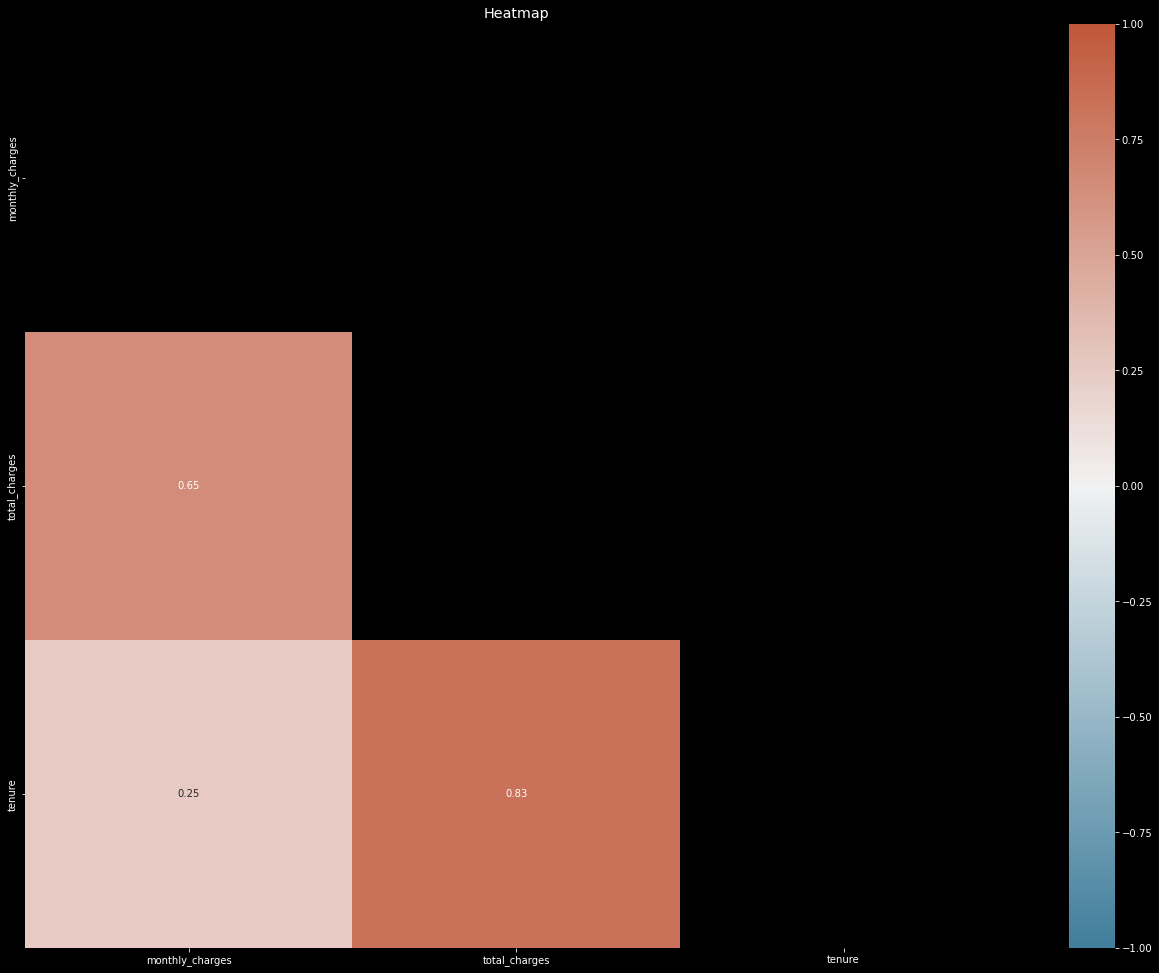

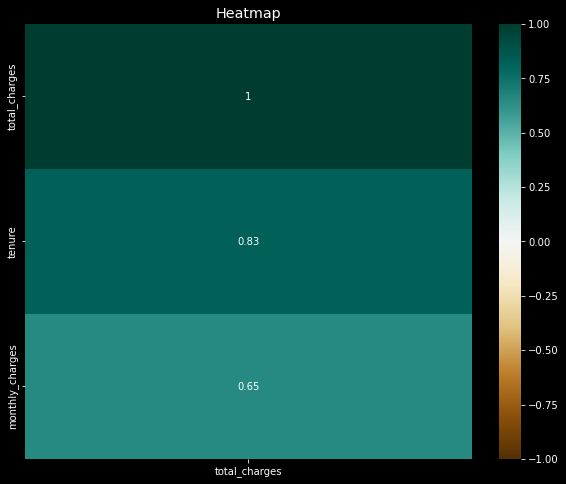

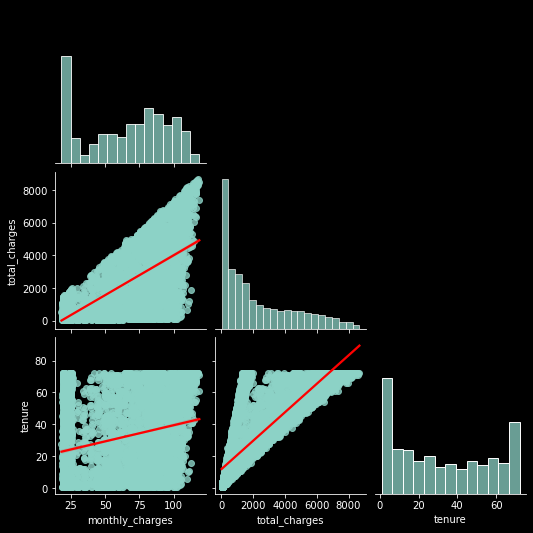

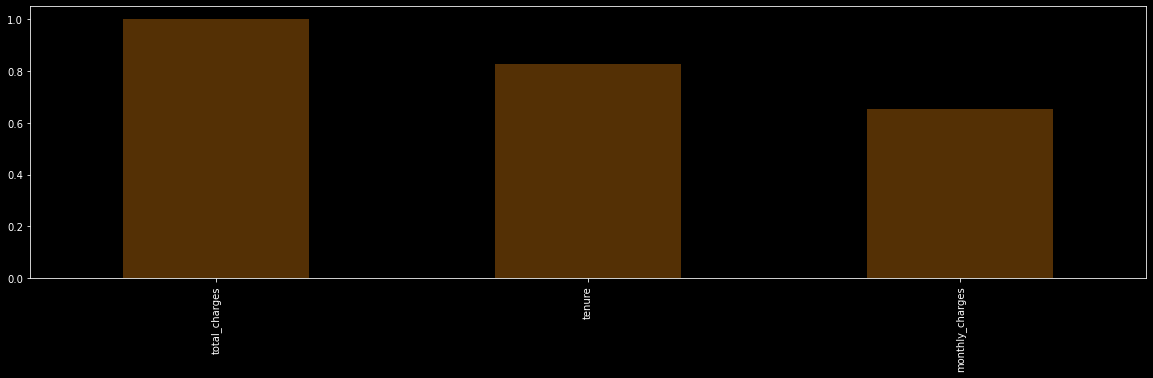

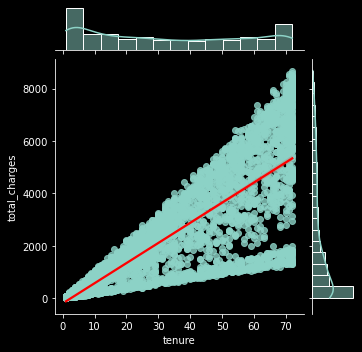

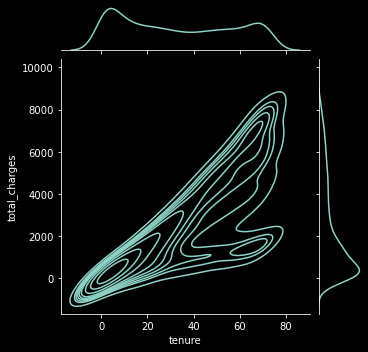

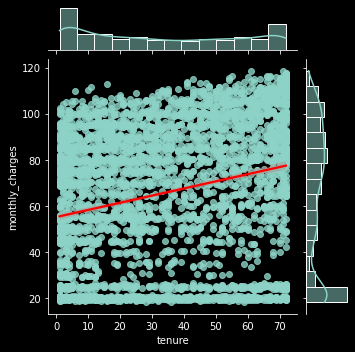

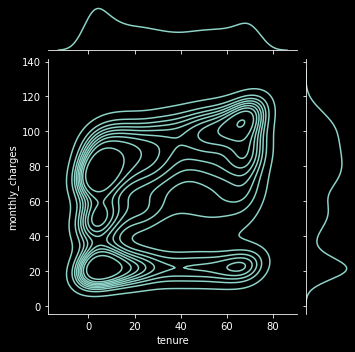

In [16]:
corrstatsgraphs(train)

    

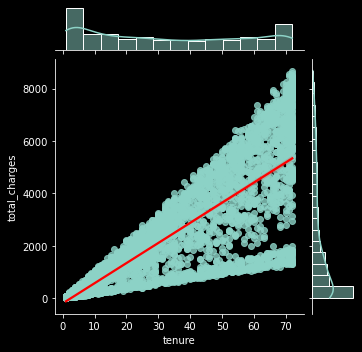

In [26]:
sns.jointplot(x="tenure", y="total_charges", data=train,  kind='reg', height=5, line_kws={'color': 'red'})
plt.show()


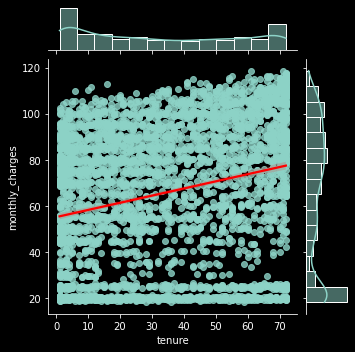

In [38]:
sns.jointplot(x="tenure", y="monthly_charges", data=train, ratio=5, kind='reg', height=5, line_kws={'color': 'red'})
plt.show()

In [27]:
train.columns

Index(['monthly_charges', 'total_charges', 'tenure'], dtype='object')

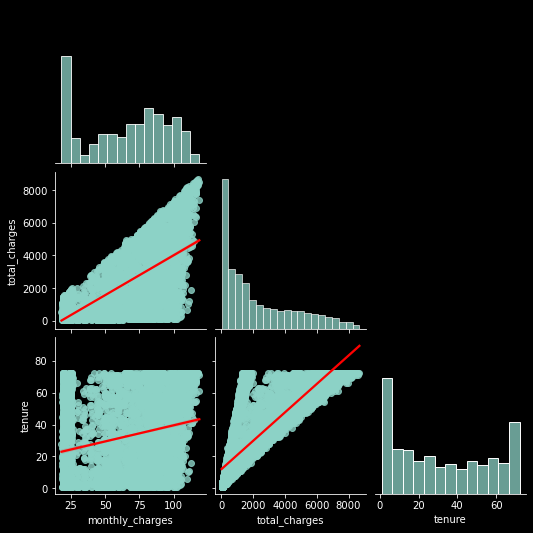

In [33]:
sns.pairplot(train[['monthly_charges', 'total_charges', 'tenure']], corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()